In [1]:
%matplotlib inline

import re
import seaborn as sns
import oceanwaves
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

/Users/hoonhout/Python/VirtualEnvs/ci/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# From significant wave height to directional spectrum, and back

(2, 4) m


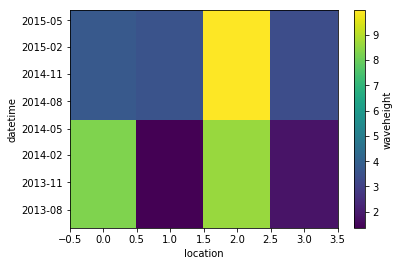

In [2]:
# measurement times
time     = [datetime(2013,12,1),
            datetime(2014,12,2)]

# measurement locations
location = [(0,0),(0,1),(1,1),(.5,.5)]

# initialize OceanWaves object
ow = oceanwaves.OceanWaves(time=time,
                           time_var='datetime',
                           location=location,
                           crs='epsg:28992',
                           energy_units='m',
                           energy_var='waveheight')   # note we are defining wave heights here!

ow['_energy'].values = np.random.rand(*ow.shape) * 10.    # random wave heights

# plot data and print shape and units
ow.plot()
print(ow.shape, ow.units)

(2, 4, 99) m^2 Hz^-1


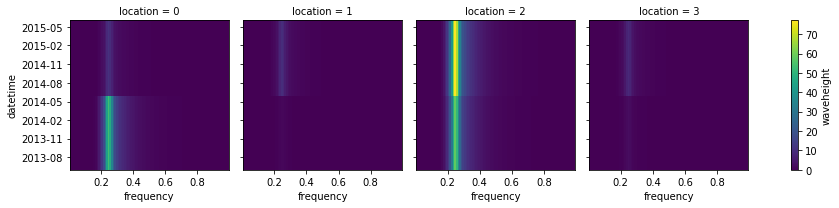

In [3]:
# convert wave heights to wave spectrum with JONSWAP shape
frequency = np.arange(0,1.,.01)
ow_spc = ow.as_spectral(frequency, shape='jonswap')

# plot data and print shape and units
ow_spc.plot(col='location')
print(ow_spc.shape, ow_spc.units)

(2, 4, 99, 72) m^2 Hz^-1 deg^-1


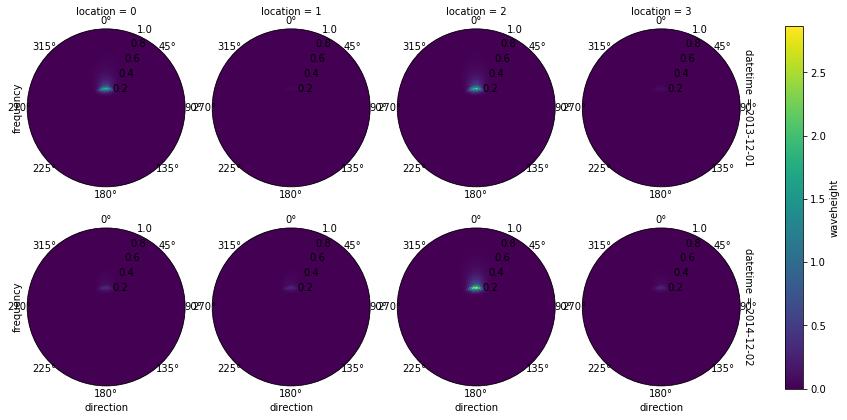

In [4]:
# convert omnidirectional wave spectrum to directional wave spectrum
theta = np.arange(0., 360., 5.)
ow_dir = ow_spc.as_directional(theta, s=5)

# plot data and print shape and units
ow_dir.plot(col='location', row='datetime')
print(ow_dir.shape, ow_dir.units)

/Users/hoonhout/Python/VirtualEnvs/ci/lib/python3.6/site-packages/xarray/core/variable.py:1180: RuntimeWarning: invalid value encountered in true_divide
  self.values = f(self_data, other_data)


(2, 4, 99) m^2 Hz^-1


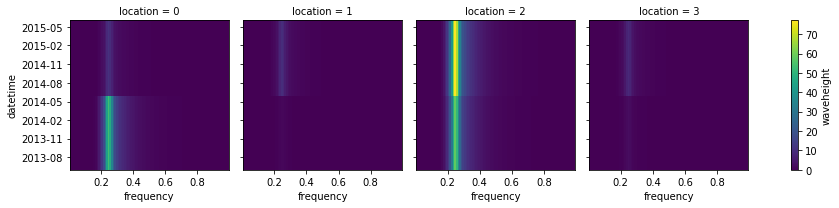

In [5]:
# convert directional wave spectrum back to omnidirectional wave spectrum
ow_omn = ow_dir.as_omnidirectional()

# plot data and print shape and units
ow_omn.plot(col='location')
print(ow_omn.shape, ow_omn.units)

(2, 4) m


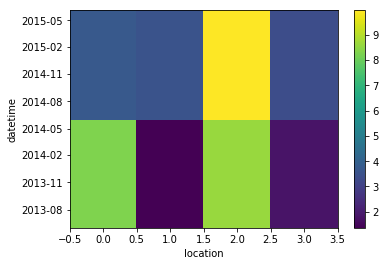

In [6]:
# convert wave spectrum to significant wave heights
ow_Hs = ow_omn.Hm0()

# plot data and print shape and units
ow_Hs.plot()
print(ow_Hs.shape, ow_Hs.units)

# Other conversions

(2, 4) s


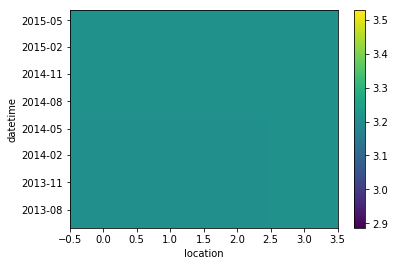

In [7]:
# convert wave spectrum to wave period
ow_Tm02 = ow_omn.Tm02()

# plot data and print shape and units
ow_Tm02.plot()
print(ow_Tm02.shape, ow_Tm02.units)

(2, 4, 72) m deg^-1


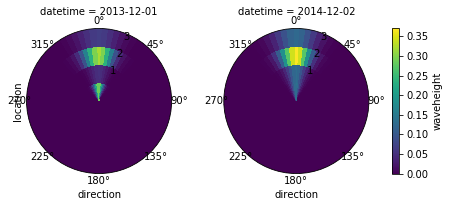

In [8]:
# convert significant wave height to directional waves
theta = np.arange(0., 360., 5.)
ow_dir2 = ow.as_directional(theta, s=5)

# plot data and print shape and units
ow_dir2.plot(col='datetime') # location is on the radials...
                             # ... and energy is still in m
print(ow_dir2.shape, ow_dir2.units)

# Plot spectra on map

/Users/hoonhout/Python/VirtualEnvs/ci/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


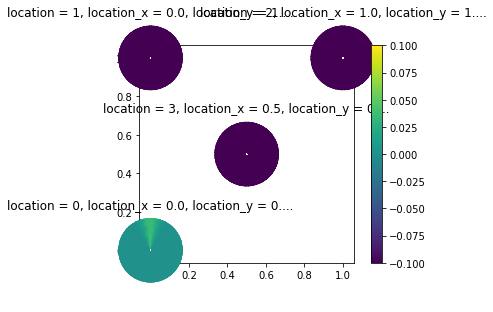

In [9]:
# plot spectra on a map
ow_dir[dict(datetime=0)].plot.spatial_map(scale=.3, subplot_kw=dict(projection='polar'))

# Read SWaN spectra and tables

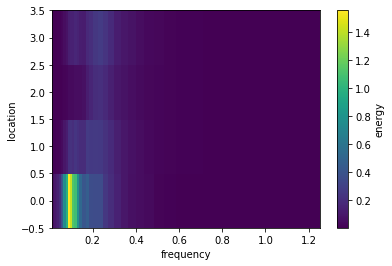

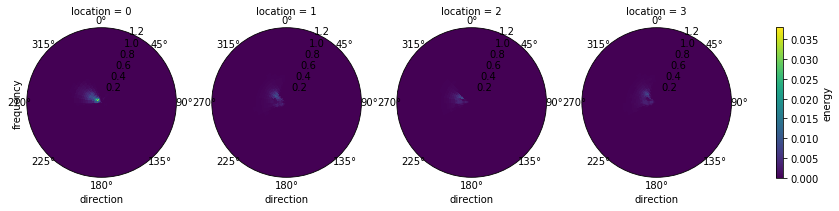

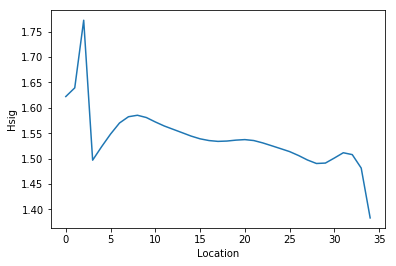

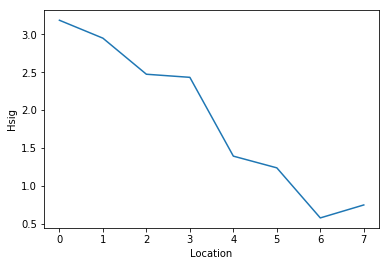

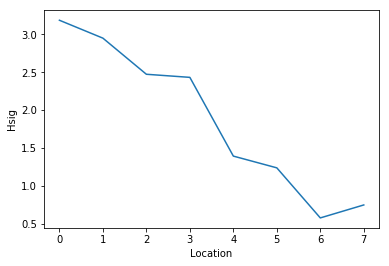

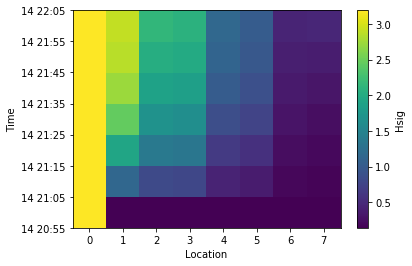

In [10]:
import oceanwaves

fig = plt.figure()
ow = oceanwaves.from_swan('../data/swan/P1.SP1')
ow.plot()

fig = plt.figure()
ow = oceanwaves.from_swan('../data/swan/P1.SP2')
ow.plot(col='location')

fig = plt.figure()
ow = oceanwaves.from_swantable('../data/swan/P1.TAB')
ow.plot()

fig = plt.figure()
ow = oceanwaves.from_swantable('../data/swan/TBL1.tbl', columns=['Xp','Yp','Botlev','Hsig','RTpeak','TPsmoo','Tm01','Tm02'])
ow.plot()

fig = plt.figure()
ow = oceanwaves.from_swantable('../data/swan/TBL2.tbl')
ow.plot()

fig = plt.figure()
ow = oceanwaves.from_swantable('../data/swan/TBL2NS.tbl')
ow.plot()

# Write SWaN spectra

In [11]:
def print_contents(fname, context=5):
    
    with open(fname, 'r') as fp:
        for line in fp:
            if re.match('[A-Z]+', line):
                n = context + 1
            if n > 0:
                print(line.strip())
            if n == 0:
                print('...')
            n -= 1

In [12]:
ow = oceanwaves.from_swantable('../data/swan/P1.TAB')
ow = ow[dict(Location=range(5))]

frequency = np.arange(0,1.,.05)
ow_spc = ow.as_spectral(frequency, shape='jonswap')
ow_spc.to_swan('P1.SP1')
print_contents('P1.SP1')

SWAN    1
LOCATIONS
5
30000.00  404500.00
35800.00  404000.00
35800.00  404500.00
36844.00  402839.00
...
AFREQ
19
0.0500
0.1000
0.1500
0.2000
...
QUANT
3
VaDens
m^2 s
-99.0
NDIR
deg
-999
DSPRDEGR
deg
-9
LOCATION    0
0.000000e+00 0.000000e+00 0.000000e+00
1.189292e-19 0.000000e+00 0.000000e+00
1.628623e-03 0.000000e+00 0.000000e+00
2.879485e-01 0.000000e+00 0.000000e+00
1.849352e+00 0.000000e+00 0.000000e+00
...
LOCATION    1
0.000000e+00 0.000000e+00 0.000000e+00
1.214468e-19 0.000000e+00 0.000000e+00
1.663099e-03 0.000000e+00 0.000000e+00
2.940440e-01 0.000000e+00 0.000000e+00
1.888501e+00 0.000000e+00 0.000000e+00
...
LOCATION    2
0.000000e+00 0.000000e+00 0.000000e+00
1.419677e-19 0.000000e+00 0.000000e+00
1.944113e-03 0.000000e+00 0.000000e+00
3.437286e-01 0.000000e+00 0.000000e+00
2.207601e+00 0.000000e+00 0.000000e+00
...
LOCATION    3
0.000000e+00 0.000000e+00 0.000000e+00
1.012743e-19 0.000000e+00 0.000000e+00
1.386856e-03 0.000000e+00 0.000000e+00
2.452028e-01 0.000000e+00 

In [13]:
theta = np.arange(0., 360., 30)
ow_dir = ow_spc.as_directional(theta, s=5)
ow_dir.to_swan('P1.SP2')
print_contents('P1.SP2')

SWAN    1
LOCATIONS
5
30000.00  404500.00
35800.00  404000.00
35800.00  404500.00
36844.00  402839.00
...
AFREQ
19
0.0500
0.1000
0.1500
0.2000
...
NDIR
12
0.00
30.00
60.00
90.00
...
QUANT
1
VaDens
m^2 s
-99.0
FACTOR
1.054724e-06
0        0        0        0        0        0        0        0        0        0        0        0
0        0        0        0        0        0        0        0        0        0        0        0
88        4        0        0        0        0        0        0        0        0        0        4
15570      876        0        0        0        0        0        0        0        0        0      876
...
FACTOR
1.077052e-06
0        0        0        0        0        0        0        0        0        0        0        0
0        0        0        0        0        0        0        0        0        0        0        0
88        4        0        0        0        0        0        0        0        0        0        4
15570      876        0        0  

# Write netCDF

In [14]:
ow_dir.to_netcdf('P1.nc')

# Read Datawell files

In [15]:
ow = oceanwaves.from_datawell('../data/datawell/example.dat')
ow.plot()

NotImplementedError: Reading of Datawell files is not yet implemented

# Reading WaveDroid files

In [16]:
ow = oceanwaves.from_wavedroid('../data/wavedroid/example.dat')
ow.plot()

NotImplementedError: Reading of WaveDroid files is not yet implemented

# Unit conversion

In [17]:
print(oceanwaves.units.simplify('m^2 / m'))
print(oceanwaves.units.simplify('m ^ 2 / m'))                               # test spaces
print(oceanwaves.units.simplify('m2 / m'))                                  # test missing exponents
print(oceanwaves.units.simplify('m^3 / (m * m)'))                           # test groups
print(oceanwaves.units.simplify('m^4 / (m * (m / m^-1))'))                  # test nested groups
print(oceanwaves.units.simplify('m^5 / (m * m)^2'))                         # test group exponents
print(oceanwaves.units.simplify('m^5 / (m * m)^2 + NAP'))                   # test terms
print(oceanwaves.units.simplify('(kg * m^2 * s^2)^2 / (kg^2 * m^3 * s^4)')) # multiple units
print(oceanwaves.units.simplify('(m^2 / Hz) * m^-2'))                       # hertz to seconds conversion

m
m
m
m
m
m
m + NAP
m
s
